In [1]:
import os
import numpy as np
import pandas as p
import zipfile 
import matplotlib.image as image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import backend as K 
from keras.layers import Dropout
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix

In [2]:
#This is to extract any necessary files. 
"""def extract(file):
    with zipfile.ZipFile(os.getcwd() + "/Pictures/" + file, 'r') as zip_ref:
        zip_ref.extractall(os.getcwd()+"/Pictures/")
extract("64.zip")
"""

'def extract(file):\n    with zipfile.ZipFile(os.getcwd() + "/Pictures/" + file, \'r\') as zip_ref:\n        zip_ref.extractall(os.getcwd()+"/Pictures/")\nextract("64.zip")\n'

In [26]:
#Augmented folder because Waldo folder only contains aa few images. 
waldo_images = os.listdir(os.getcwd() + "/Pictures/temp/waldo")
notwaldo_images = os.listdir(os.getcwd() + "/Pictures/64/notwaldo")
X = []
y = [] 
test ={}
for img in waldo_images:
    try:
        waldo = image.imread(os.getcwd() + "/Pictures/temp/waldo/" + str(img))
        X.append(waldo)
        y.append(("Waldo"))
    except:
        continue

for img in notwaldo_images:
    not_waldo = image.imread(os.getcwd() + "/Pictures/64/notwaldo/" + str(img))
    if not_waldo[0][0][0] >= 1:
        not_waldo = not_waldo/255
    X.append(not_waldo)
    y.append(("Not Waldo"))
X = np.array(X)
y = np.column_stack(y).T
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True)

ValueError: not enough values to unpack (expected 4, got 2)

In [31]:
y_train

array([['Not Waldo'],
       ['Not Waldo'],
       ['Waldo'],
       ...,
       ['Waldo'],
       ['Not Waldo'],
       ['Waldo']], dtype='<U9')

In [32]:
#Model from https://www.tensorflow.org/tutorials/images/cnn, edited as needed e.g. adding dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(Dropout(0.20))

model.add(layers.Conv2D(32, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(Dropout(0.25))

model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              #loss = "categorical_crossentropy",
              metrics=['accuracy'])



K.set_value(model.optimizer.learning_rate, .00001)
#Line of code below from https://stackoverflow.com/questions/48285129/saving-best-model-in-keras#mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
earlyStopping = EarlyStopping(monitor='accuracy', patience=2, verbose=0, mode='max')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='accuracy', mode='max')
history = model.fit(X_train, y_train, epochs=10, callbacks=mcp_save)



Epoch 1/10


ValueError: in user code:

    File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/michael/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [ ]:
model.evaluate(X_test,y_test)

65/65 [==============================] - 1s 13ms/step - loss: 0.2320 - accuracy: 0.9836


[0.23196078836917877, 0.9835590124130249]

In [ ]:
images=[]
waldo = 0 
iter = 0 
for i in os.listdir(os.getcwd()+"/Pictures/64/Test/"):
   try:
      #print(os.getcwd()+"/Pictures/64/Test/"+i)
      if image.imread(os.getcwd()+"/Pictures/64/Test/"+i).shape == (64, 64, 3):
         if i == 'good.jpg':
            waldo = iter
         images.append(image.imread(os.getcwd()+"/Pictures/64/Test/"+i))
         iter+=1
   except:
      continue

predictor = model.predict((np.asarray(images)))
decisions = []
index = 0
for i in predictor:
   decisions.append(i[1])
   if index == waldo:
      print (i)
   index+=1
decisions = np.asarray(decisions)
waldo

[-51.386173  37.552483]


29

In [ ]:
np.argsort(decisions)

array([428, 528, 550, 603, 731, 188, 501, 568, 622, 651, 601, 196, 449,
       572, 266, 332, 286,  49,  44, 644, 171, 229, 282, 617, 682, 678,
       680, 589, 659,  86,   1, 640, 230, 696, 279, 386, 270, 660, 185,
       497, 319, 238, 354, 598,  58, 385,  92, 628, 107, 274, 289, 586,
        72, 711, 396, 361, 511, 473, 306, 623, 216, 744, 186, 596,  76,
       588,   8, 642, 228, 253,  97, 104, 194, 751, 531, 100, 431, 495,
        41, 519, 265, 243, 453,  13, 555, 575, 670,  99, 376, 345, 338,
       148, 362, 264,  16, 631, 262, 466, 195, 705, 512,   4, 419, 337,
       411, 177, 235, 571,  57, 464, 358, 213, 113, 267, 127,  73,  15,
       544, 114, 570, 595, 199, 271, 382, 116, 278, 117, 677, 360, 254,
       692, 557, 541, 741, 309,  84, 315, 157, 561, 737, 288, 302, 445,
       321, 609, 366,  93, 393, 585, 540,  30, 560, 341, 463, 129, 326,
       719,  83, 458, 636, 153, 739, 294, 304, 132, 406,  74, 249,  39,
       381, 654, 137, 251, 618, 717, 437, 160, 103, 350, 401, 75

In [ ]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
actual = []
for i in y_test:
    actual.append(np.argmax(i))

decisions = []
for i in model.predict(X_test):
    decisions.append(np.argmax(i))

confusion_matrix(actual, decisions)

array([[1056,   17],
       [  17,  978]])

In [ ]:
decisions[1]

1

In [ ]:
model.predict(images[4].reshape(1,64,64,3))

array([[ 279.58755, -321.66098]], dtype=float32)

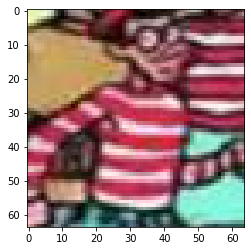

In [ ]:
plt.imshow(images[29])

In [ ]:
from PIL import Image
img = Image.open("/Users/michael/Desktop/CompSci/Courses/ANN 539/Final/Pictures/64/Test/good.jpg") # image extension *.png,*.jpg
img = img.convert('RGB')
new_width  = 64
new_height = 64
img = img.resize((new_width, new_height), Image.ANTIALIAS)
img.save(os.getcwd()+"/Pictures/64/Test/good.jpg")


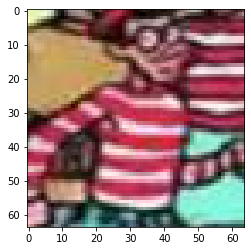

In [ ]:
#Waldo
plt.imshow(images[waldo])

In [ ]:
#Top choice
plt.imshow(images[286])

In [ ]:
""""#The ccode below is for generating the necessary images. They've already bbeen generated whch is why it's commented out. 

#This is from https://github.com/ThomasADuffy/Whos-Waldo-Capstone-2/blob/master/images/plots_structures/Model_v1.jpg
#datagen edited as needed
#Images from https://github.com/mrrehani/deepRed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=(.1,1.3),
    fill_mode='nearest')
i = 0
gen= datagen.flow_from_directory(
        os.getcwd() + "/Pictures/64/",
        target_size=(64, 64),
        batch_size=1, color_mode='rgb',
    class_mode='binary', shuffle=True, interpolation='nearest',
    save_to_dir= os.getcwd() + "/Pictures/64/augmented",save_prefix="changed")
i = 0

while i <= 5000:
    try:
        gen.next()
        i+=1
    except:
        break""""
